# Лабораторная работа №2. Дискриминантный анализ.


### 1. Подготовка библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np # поддерживает матрицы, массивы, мат.функции для них
import pandas as pd # библиотека для анализа данных
from scipy.stats import f
from scipy.spatial.distance import mahalanobis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 2. Преддискриминантный этап анализа
Целью дискриминантного анализа является разделение рассматриваемой совокупности объектов или явлений на заданные обучающими выборками классы. Исходные данные для анализа представлены в виде матрицы.

Есть два способа создания тренировочной выборки - с помощью списка TRAIN_SAMPLES или заполнение вручную стобца в Excel-файле.

In [2]:
_ = \
"""
    Что поменять:
        0) названия файлов, для считывания и для записи(этот в самом конце)
        1) FEATURES
        2) задать TRAIN_SAMPLES, если не задается, то удалить параметр из вызова функции gen_train_data
        3) задать F to enter в sda
"""

In [3]:
# В переменную FEATURES записываем названия показателей
FEATURES = ["Население","ОК(кроме 6001) Возм. не представлено (объем)","ОК(кроме 6001) Возм. не представлено (кол-во)","Расходные операции 6001(кол-во)","Приходные операции 6001(кол-во)","Расходные операции 6001","Доли выв. ДС в заруб. банки","Кол-во риск-ориентировок запросы","Кол-во проверок","КВО 4005 Всего (объем)","КВО 4005 Всего (кол-во)","ВК (6001) Всего (объем)","ВК (6001) Всего (кол-во)","Приходные операции 6001","05 Доли сомнительных операций","Общий объем опер.90дн.","Общее кол-во опер.90дн.","ВК (6001) Всего (объем)90дн.","Общий объем опер.30дн.","ВК (6001) Всего (кол-во)90дн.","Общее кол-во опер.30дн.","09 Доли возм. не представленных сообщений","08 Доли кол-во КВО 5007 возм. не предст. сообщений","КВО 5007 Всего (кол-во)","КВО 5007 Всего (объем)","КВО 5007 Возм. не представлено (объем)","07 Доли объема возм. не предст. сообщений по ВК","КВО 5007 Возм. не представлено (кол-во)","06 Доли объема возм. не предст. сообщений по ОК","03 Доли выв. ДС в заруб. банки(без оффш.)","04 Доли выв. ДС в оффшор. банки","02 Доли опер. обналич","01 Доли опер. с фиктивными","КВО 4007 Всего (кол-во)","КВО 4007 Всего (объем)","КВО 4007 Возм. не представлено (объем)","КВО 4007 Возм. не представлено (кол-во)","ВК(6001) Возм. не представлено (объем)","ВК(6001) Возм. не представлено (кол-во)","Сообщения объем 4077 (3041)","Сообщения кол-во 4077 (3041)","Приход/расход 6001","Приход/расход","Снятие наличных денежных средств","Сомнительные операции","Перечисления со счетов оффшорных банков","Перечисления со счетов зарубежных банков","Перечисления на счета в оффшорных банках","Перечисления на счета в зарубежных банках(без оффш.)","Перечисления на счета в зарубежных банках","Операции с организациями, имеющими признаки фиктивности(кол-во)","Операции с организациями, имеющими признаки фиктивности","Общий объем операций 6001","ВК(6001) Всего (кол-во)","ВК(6001) Всего (объем)","Общий объем операций (руб.)","Общее кол-во операций 6001","Общее кол-во операций","Обороты за отчетный период по кредиту «итого», тыс.руб.;счета Депо – в штуках","Сотня по активам","Общий объем операций с бюдж. орг.","Обороты за отчетный период по дебету «итого», тыс.руб.;счета Депо – в штуках","Кол-во юр. лиц","Кол-во фиктивности  юр. лиц","Кол-во физ. лиц","Кол-во получ. бюджетных средств","Кол-во не опоз. юл/фл","Кол-во клиентов-нерезидентов","Доли фиктивности  юр. лиц","Кол-во клиентов есть счет","Кол-во клиентов","Доли клиентов физ. лиц","Доли клиентов юр. лиц","Доли  клиентов-нерезидентов"] 


In [4]:
data = pd.read_excel(r'C:\Users\Николай\Downloads\Dannye_UIR.xlsx',0)
FEATURES = list(data.columns.values)
f_len = len (FEATURES)                
data.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов,Train sample
0,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462,0.0
1,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011,0.0
2,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.0
3,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764,0.0
4,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000,1.0


In [5]:
val = []
i = 0
for name in FEATURES:
    #print(name)
    val.append(data.columns[i].replace(name,'X'+str(i+1)))
    i = i+1
data.columns = val

FEATURES = list(data.columns.values)

Создаем новую переменную, в которую будем записывать все данные, которые необходимо включить в итоговый Excel-файл.

In [6]:
data_to_excel = data[FEATURES]

Далее, вводим функцию gen_train_data по созданию тренировочной выборки.
<br>Аргументы функции: 
- data - данные для анализа
- features - названия признаков 
- train_samples - опциональный параметр: если он передан, то разбиение классов обучающей выборкой задается при помощи train_samples (1 часть ЛР), в противном случае разбиение должно присутствовать в одном из столбцов data (2 часть ЛР)

In [7]:
def gen_train_data(data, features, train_samples=None):
    if train_samples: # если опциональный параметр задан
        train_data = pd.DataFrame() # создаем тренировочную выборку, пока пустую
        for cls, samples in train_samples.items(): # в cls записываем номера классов, в samples список объектов этого класса
            train_samps = data[features].loc[samples] # выбираем объекты обучающей выборки
            train_samps["Class"] = cls # добавляем к ним колонку с номером класса
            train_data = pd.concat([train_data, train_samps]) # concat - функция объединения таблиц
    else:
        assert data.shape[1] == len(features) + 1 # если в исходном файле нет доп.колонки с разбиением, выдаст ошибку
        train_data = data.dropna() # берем в тренировочную выборку только те строки, где проставлены классы
        cls_col = train_data.drop(columns=features).columns[0] 
        train_data = train_data.rename({cls_col: "Class"}, axis=1) # переименовываем колонку с обучающей выборкой на  "Class"
    train_data = train_data.astype({"Class": 'int32'}) # присваем колонке "Class" тип int
    return train_data

In [8]:
# если классы заданы в файле - TRAIN_SAMPLES надо удалить
train_data = gen_train_data(data, FEATURES)
train_data.head(5) # смотрим результаты работы функции gen_train_data

AssertionError: 

Добавим столбец с обучающей выборкой в переменную.

In [ ]:
data_to_excel["Train sample"] = train_data.Class

Для расчета Лямбды Уилкса необходимо знать: <br>
1) общая матрица рассеяния: 
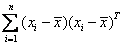

2) внутриклассовые матрицы разброса
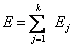

где 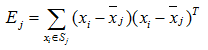

In [ ]:
# проведем расчет матрицы рассеяния 

def scatter_matrix(samples):
    if isinstance(samples, pd.Series):
        samples = samples.to_frame()
    d = samples - samples.mean()
    res = np.zeros((d.shape[1], d.shape[1]))
    for _, row in d.iterrows():
        col = row.to_frame()
        res += np.dot(col,col.T)
    return res

In [ ]:
# проведем расчет внутриклассовых матриц разброса

def classes_scatter_matrix(samples, labels):
    A = np.zeros((samples.shape[1], samples.shape[1]))
    for cls in labels.unique():
        A += scatter_matrix(samples[labels == cls])
    return A

Рассчитаем ковариационную матрицу:

In [ ]:
# выведем ковариационную матрицу
# она рассчитывается как классовая матрица рассеяния "classes_scatter_matrix", деленная на (кол-во объектов - кол-во классов)

cov = pd.DataFrame(
    classes_scatter_matrix(train_data[FEATURES], train_data.Class) / (train_data.shape[0] - train_data.Class.unique().size), 
    index=FEATURES, 
    columns=FEATURES
)

cov

Для проведения дискриминантного анализа используем возможности класса LinearDiscriminantAnalysis.

In [ ]:
# "обучаем" модель с помощью метода fit класса LinearDiscriminantAnalysis 
# в метод fit передаем исходные данные
lda = LinearDiscriminantAnalysis().fit(train_data[FEATURES], train_data.Class)

Рассчитаем оценки математических ожиданий в классах.

In [ ]:
# выведем средние значения параметров для каждого класса обучающей выборки
means = pd.DataFrame(lda.means_, index=lda.classes_, columns=FEATURES)
means

### 3.	Дискриминантный анализ

Определим линейные дискриминантные функции Фишера.
Зададим функцию вывода коэффициентов функции Фишера.

In [ ]:
def get_df_coef(lda, features):
    if lda.classes_.size == 2: #если 2 класса, то lda вернет разность коэффициентов функций
        return pd.DataFrame(
            np.concatenate([lda.intercept_, lda.coef_.ravel()]),
            index=["Intercept"] + features,
            columns=["Discriminant F"]
        )
# если 3 и более классов, то lda вернет несколько функций (аналогично ППП Statistica)
    return pd.DataFrame(
        np.vstack([lda.intercept_, lda.coef_.T]),
        index=["Intercept"] + features,
        columns=lda.classes_
    )

In [ ]:
df_coef = get_df_coef(lda, FEATURES) # применим эту функцию для наших параметров
df_coef

Зададим функцию расчета квадратов расстояний Махаланобиса между классами, где:
 - centers - центры классов
 - samples - объекты, для которых считаем расстояния
 - cov - ковариационная матрицы

In [ ]:
def calc_mahalanobis_square_dist(centers, samples, cov):
    # создаем матрицу расстояний между классами и объекnами
    res = pd.DataFrame(index=samples.index, columns=centers.index)
    for i in centers.index: # проходим по всем центрам классов
        for j in samples.index: # проходим по всем объектам
            # считаем расстояние между текущим классом и объектом
            res[i][j] = mahalanobis(centers.loc[i], samples.loc[j], np.linalg.inv(cov)) ** 2 
    res.head(10)        
    return res

In [ ]:
# выведем квадраты расстояний Махаланобиса между классами
center_distance = calc_mahalanobis_square_dist(means, means, cov)
center_distance

Выведем оценки априорных вероятностей:

In [ ]:
lda.priors_ 

Далее, определим функцию вывода номеров классов для переданных X:

In [ ]:
def LDA_predict(lda, X):
    return pd.DataFrame(
        lda.predict(X),
        columns=["Class"],
        index=X.index
    )

Поведем повторную классификацию объектов тренировочной выборки:

In [ ]:
lda_predict_train = LDA_predict(lda, train_data[FEATURES])
# сравниваем полученные классы с теми, которые были заданы в начале, и смотрим долю совпадения
(lda_predict_train.Class == train_data.Class).value_counts(normalize=True)

Получим полную картину классификации всех объектов:

In [ ]:
lda_predict = LDA_predict(lda, data[FEATURES])
lda_predict.head

Запишем результаты классификации в переменную.

In [ ]:
data_to_excel["Results lda"] = lda_predict

Выведем квадраты расстояний Махаланобиса между классами и объектами:

In [ ]:
samp_dist = calc_mahalanobis_square_dist(means, data[FEATURES], cov)
samp_dist.head()

In [ ]:
data_to_excel = pd.concat([data_to_excel, samp_dist.add_prefix("lda mahalanobis ")], axis=1)

Зададим функцию для вывода апостериорных вероятностей:

In [ ]:
def LDA_predict_proba(lda, X):
    return pd.DataFrame(
        lda.predict_proba(X),
        columns=lda.classes_,
        index=X.index
    )

Применим функцию LDA_predict_proba для наших данных:

In [ ]:
lda_post_prob = LDA_predict_proba(lda, data[FEATURES])
lda_post_prob.head()

In [ ]:
data_to_excel = pd.concat([data_to_excel, lda_post_prob.add_prefix("lda post prob ")], axis=1)

### 4.	Пошаговый дискриминантный анализ

Зададим функцию расчета Лямбды Уилкса:

In [ ]:
def wilks_lambda(samples, labels):
    if isinstance(samples, pd.Series):
        samples = samples.to_frame()
    dT = np.linalg.det(scatter_matrix(samples)) # расчет определителя матрицы рассеяния
    dE = np.linalg.det(classes_scatter_matrix(samples, labels)) # расчет определителя матрицы классового рассеяния
    return dE / dT # их частное и есть Лямбда Уилкса

Зададим функцию расчета f value и p value :
- lmbda - Лямбда Уилкса
- n_obs - кол-во объектов
- n_var - кол-во признаков
- n_cls - кол-во классов

In [ ]:
def f_value_wilks_lambda(lmbda, n_obs, n_var, n_cls):
    num = (1 - lmbda) * (n_obs - n_cls - n_var)
    den = lmbda * (n_cls - 1)
    f_value = num / den #значение статистики Фишера
    # f.sf считает p value для определенного значения статистики Фишера и заданных степеней свободы
    p_value = f.sf(f_value, n_cls - 1, n_obs - n_cls - n_var) 
    return f_value, p_value

sda - функция для проведения пошагового дискриминантного анализа:
 - samples - набор объектов
 - labels - названия классов
 - F_in=1e-4 - установленное нами значение F_to_Enter
Функция выводит для каждого шага переменные в модели(into) и вне модели(out) и их характеристики.

In [ ]:
def sda(samples, labels, F_in=1):
    stat_columns = ["Wilk's lambda", "Partial lambda", "F to enter", "p-value"]
    n_cls = labels.unique().size # количество классов
    n_obs = samples.shape[0] # количество объектов
    
    # словари для вывода переменных в модели и вне модели на каждом шаге
    out = {0: pd.DataFrame(columns=stat_columns, index=samples.columns, dtype=float)} 
    into = {0: pd.DataFrame(columns=stat_columns, dtype=float)}
    
    step = 0
    while True:
        model_lambda = wilks_lambda(samples[into[step].index], labels) #посчитали Лямбду Уилкса для модели на данном шаге
        
        for x in out[step].index: # проходим по переменным вне модели на данном шаге
        # далее рассчитываем характеристики для данных переменных и записываем их в таблицу    
            lmbda = wilks_lambda(samples[into[step].index.tolist() + [x]], labels) 
            partial_lambda = lmbda / model_lambda
            f_lambda, p_value = f_value_wilks_lambda(partial_lambda, n_obs, into[step].index.size, n_cls)
            out[step].loc[x] = lmbda, partial_lambda, f_lambda, p_value 
            
        for x in into[step].index: # проходим по переменным в модели на данном шаге
        # далее рассчитываем характеристики для данных переменных и записываем их в таблицу  
            lmbda = wilks_lambda(samples[into[step].index.drop(x)], labels)
            partial_lambda = model_lambda / lmbda
            f_lambda, p_value = f_value_wilks_lambda(partial_lambda, n_obs, into[step].index.size - 1, n_cls)
            into[step].loc[x] = lmbda, partial_lambda, f_lambda, p_value
            
        # критерий для остановки цикла 
        # если вне модели нет переменных ИЛИ новая переменная обладает f_to_enter меньше порогового значения, цикл остановлен
        if out[step].index.size == 0 or out[step]["F to enter"].max() < F_in:
            break
        
        # ищем элемент с max f_to_enter
        x_to_enter = out[step]["F to enter"].idxmax()
        # переносим его из элементов "вне модели" в элементы "в модели"
        into[step + 1] = into[step].append(out[step].loc[x_to_enter])
        out[step + 1] = out[step].drop(index=x_to_enter)
        
        step += 1 # переходим к следующему шагу
        
    return into, out 

Вызываем результаты работы заданной выше функции:

In [ ]:
into, out = sda(train_data[FEATURES], train_data.Class, 2.2)

Выводим результаты работы для переменных "в модели" на экран:

In [ ]:
for i, t in into.items():
    print("Step ", i)
    print(t, end="\n\n")

Выводим результаты работы для переменных "вне модели" на экран:

In [ ]:
for i, t in out.items():
    print("Step ", i)
    print(t, end="\n\n")

Выводим названия признаков в модели:

In [ ]:
stepwise_features = into[len(into) - 2].index.tolist()
stepwise_features

Проводим дискриминантный анализ для отобранных признаков.

In [ ]:
stepwise_lda = LinearDiscriminantAnalysis().fit(train_data[stepwise_features], train_data.Class)

 Выводим коэффициенты функции Фишера на экран.

In [ ]:
stepwise_df_coef = get_df_coef(stepwise_lda, stepwise_features)
stepwise_df_coef

Пполучим полную картину классификации всех объектов.

In [ ]:
stepwise_lda_predict = LDA_predict(stepwise_lda, data[stepwise_features])
stepwise_lda_predict.head()

Запишем результаты классификации в переменную.

In [ ]:
data_to_excel["Results stepwise lda"] = stepwise_lda_predict

In [ ]:
stepwise_cov = classes_scatter_matrix(train_data[stepwise_features], train_data.Class) \
    / (train_data.shape[0] - train_data.Class.unique().size)

stepwise_means = pd.DataFrame(stepwise_lda.means_, index=stepwise_lda.classes_, columns=stepwise_features)

stepwise_samp_dist = calc_mahalanobis_square_dist(stepwise_means, data[stepwise_features], stepwise_cov)
stepwise_samp_dist.head()

In [ ]:
data_to_excel = pd.concat([data_to_excel, stepwise_samp_dist.add_prefix("stepwise lda mahalanobis ")], axis=1)

In [ ]:
stepwise_lda_post_prob = LDA_predict_proba(stepwise_lda, data[stepwise_features])
stepwise_lda_post_prob.head()

In [ ]:
data_to_excel = pd.concat([data_to_excel, stepwise_lda_post_prob.add_prefix("stepwise lda post prob ")], axis=1)
data_to_excel.head()

Записываем результаты проведенной работы в файл.

In [ ]:
data_to_excel.to_excel("лр2.xlsx")